In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# y = 3x + 2 + noise
torch.manual_seed(42)
X = torch.linspace(0, 1, 100).unsqueeze(1)  # shape (100, 1)
y = 3 * X + 2 + 0.1 * torch.randn(X.size())  # shape (100, 1)

In [24]:
y[:5], X[:5]

(tensor([[2.1927],
         [2.1790],
         [2.1507],
         [1.8804],
         [2.1891]]),
 tensor([[0.0000],
         [0.0101],
         [0.0202],
         [0.0303],
         [0.0404]]))

In [3]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  # 1 input, 1 output

    def forward(self, x):
        return self.linear(x)

In [15]:
model = LinearRegressionModel()

In [16]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [17]:
epochs = 1000
for epoch in range(epochs):
    model.train()

    # Forward pass
    predictions = model(X)
    loss = criterion(predictions, y)

    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [100/1000], Loss: 0.0244
Epoch [200/1000], Loss: 0.0106
Epoch [300/1000], Loss: 0.0097
Epoch [400/1000], Loss: 0.0096
Epoch [500/1000], Loss: 0.0096
Epoch [600/1000], Loss: 0.0096
Epoch [700/1000], Loss: 0.0096
Epoch [800/1000], Loss: 0.0096
Epoch [900/1000], Loss: 0.0096
Epoch [1000/1000], Loss: 0.0096


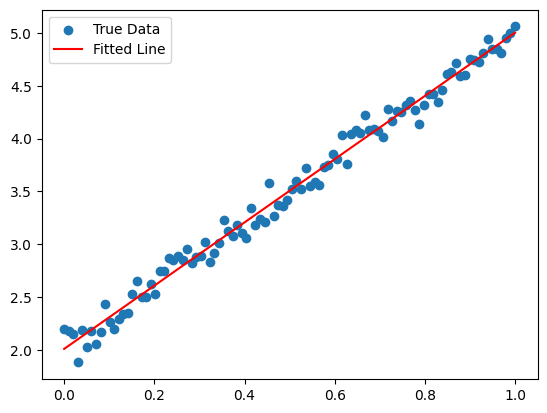

In [18]:
model.eval()
with torch.no_grad():
    predicted = model(X)

plt.scatter(X.numpy(), y.numpy(), label="True Data")
plt.plot(X.numpy(), predicted.numpy(), color="red", label="Fitted Line")
plt.legend()
plt.show()

In [19]:
print("Learned weight:", model.linear.weight.item())
print("Learned bias:", model.linear.bias.item())

Learned weight: 2.99409556388855
Learned bias: 2.0089292526245117
